In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
from PIL import Image
from torchvision import transforms
import torch

from models import DLinkNet34, LinkNet34, FarSegNet
from utils import radio_calibrate

# Raw Data & Model

In [2]:
def plt_improve(p):
    p.xticks([])
    p.yticks([])

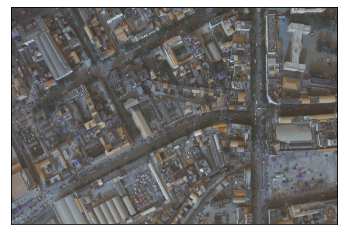

In [3]:
img_path = '/home/renyan/ossdata/gf-yunnan/IMG_0336.JPG'
img = cv2.imread(img_path)
plt.imshow(img)
plt_improve(plt)
plt.savefig('predict_result/final_report/gf_original.png', bbox_inches='tight')

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = FarSegNet.FarSegNet().to(device)
net.eval()
net.load_state_dict(torch.load('checkpoints/' + 'v2_farseg_epoch100.pth'))

<All keys matched successfully>

In [6]:
def plot_pred(img_part, type = 'prob', both = True, threshold = 0.2):
    if both:
        plt.subplot(1, 2, 1)
        plt.imshow(img_part.permute(1, 2, 0))
        plt_improve(plt)
        plt.subplot(1, 2, 2)
    probs, preds = net(img_part.unsqueeze(dim=0).to(device))
    if (type == 'pred')|(type == 0):
        pred = (probs > threshold).float()
        plt.imshow(torch.cat([pred.squeeze().unsqueeze(dim=0)]*3).permute(1, 2, 0).cpu().detach().numpy())
        plt_improve(plt)
    elif (type == 'prob')|(type == 1):
        plt.imshow(probs.squeeze().cpu().detach().numpy()*5)
        plt_improve(plt)
    else:
        print("Wrong type")

# Clip

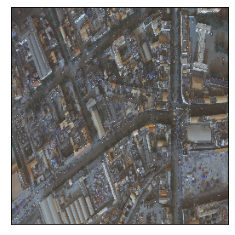

In [7]:
transform = transforms.Compose([transforms.Resize([256, 256], 0), transforms.ToTensor(),])
img_part = transform(Image.fromarray(img))
plt.imshow(img_part.permute(1, 2, 0))
plt_improve(plt)
plt.savefig('predict_result/final_report/gf_clip.png', bbox_inches='tight')

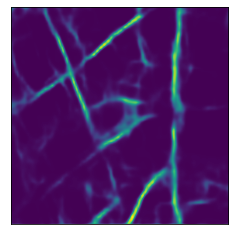

In [13]:
plot_pred(img_part, type = 1, both = False)
plt.savefig('predict_result/final_report/pred_clip.png', bbox_inches='tight')

# Radiometric Calibration

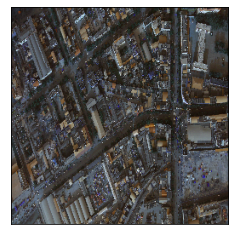

In [14]:
img_cali = torch.tensor(radio_calibrate(img_part)).float()
plt.imshow(img_cali.permute(1, 2, 0))
plt_improve(plt)
plt.savefig('predict_result/final_report/gf_cali.png', bbox_inches='tight')

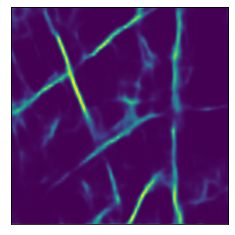

In [22]:
plot_pred(img_cali, 1, both = False)
plt.savefig('predict_result/final_report/pred_cali.png', bbox_inches='tight')

# Enhance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


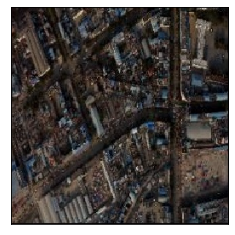

In [20]:
img_enhance = cv2.imread('predict_result/final_report/gf_enhance.png')
img_enhance = transform(Image.fromarray(img_enhance))
img_enhance = torch.tensor(img_enhance)

plt.imshow(img_enhance.permute(1, 2, 0))
plt_improve(plt)
plt.savefig('predict_result/final_report/gf_enha.png', bbox_inches='tight')

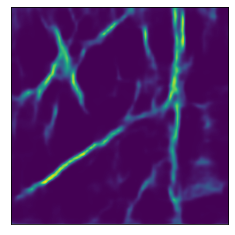

In [21]:
plot_pred(img_enhance, 1, both = False)
plt.savefig('predict_result/final_report/pred_enha.png', bbox_inches='tight')